In [1]:
import matplotlib.pyplot as plt
from rodriguez import *

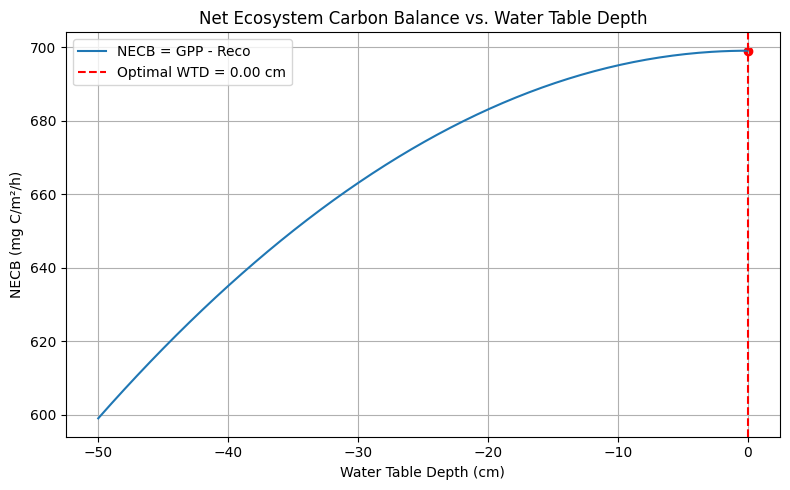

In [2]:
GPP_params = {'GPP_max': 1200, 'k': 300, 'alpha': 1.5}
Reco_params = {'t1': 1.0, 'a': 2.0, 'b': 0.7, 'c': 0.2, 'WTD_max': 0}

# Environmental conditions (example)
PAR = 1000
RVI = 5.0
Ts = 12.0

# Range of WTD values to test (e.g., -50 cm to 0 cm)
WTD_values = np.linspace(-50, 0, 200)
NECB_values = []

for WTD in WTD_values:
    gpp = gpp_model(PAR, RVI, Ts, **GPP_params)
    reco = reco_model_4(RVI, WTD, Ts, **Reco_params)
    NECB = gpp - reco
    NECB_values.append(NECB)

NECB_values = np.array(NECB_values)

# Find optimal WTD
optimal_index = np.argmax(NECB_values)
optimal_WTD = WTD_values[optimal_index]
max_NECB = NECB_values[optimal_index]

# -------------------
# Plotting
# -------------------
plt.figure(figsize=(8, 5))
plt.plot(WTD_values, NECB_values, label='NECB = GPP - Reco')
plt.axvline(optimal_WTD, color='red', linestyle='--', label=f'Optimal WTD = {optimal_WTD:.2f} cm')
plt.scatter([optimal_WTD], [max_NECB], color='red')
plt.title('Net Ecosystem Carbon Balance vs. Water Table Depth')
plt.xlabel('Water Table Depth (cm)')
plt.ylabel('NECB (mg C/m²/h)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


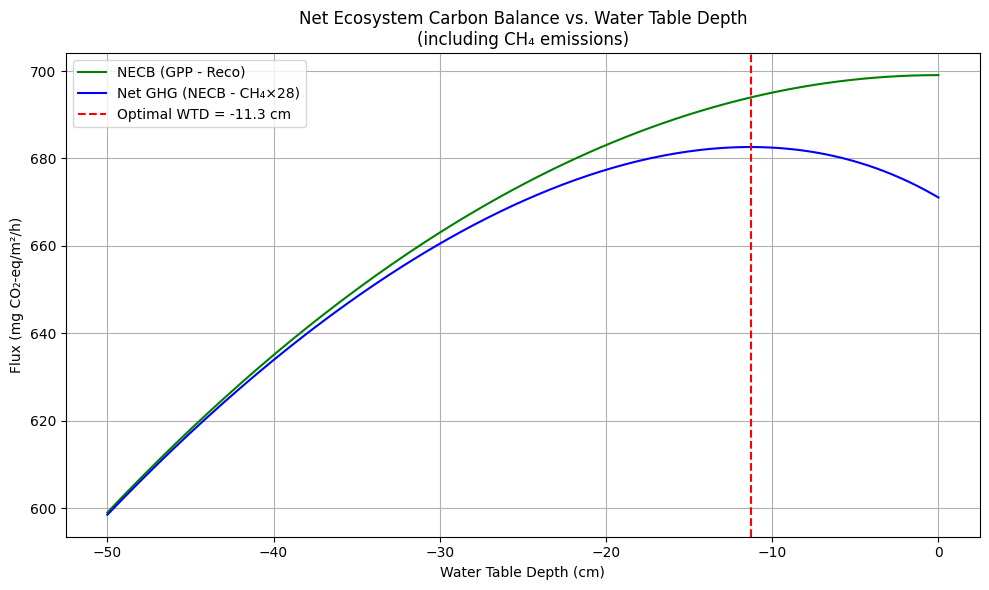

In [3]:
# GWP factor for CH4
from simulation.rodriguez.rodriguez import ch4_emission


GWP_CH4 = 28  # 100-year timescale

# Parameters
GPP_params = {'GPP_max': 1200, 'k': 300, 'alpha': 1.5}
Reco_params = {'t1': 1.0, 'a': 2.0, 'b': 0.7, 'c': 0.2, 'WTD_max': 0}

# Environmental inputs
PAR = 1000
RVI = 5.0
Ts = 12.0

# Water table depth range
WTD_values = np.linspace(-50, 0, 200)
NECB_values = []
CH4_values = []
NetGHG_values = []

for WTD in WTD_values:
    gpp = gpp_model(PAR, RVI, Ts, **GPP_params)
    reco = reco_model_4(RVI, WTD, Ts, **Reco_params)
    necb = gpp - reco
    ch4 = ch4_emission(WTD)
    net_ghg = necb - (ch4 * GWP_CH4)
    
    NECB_values.append(necb)
    CH4_values.append(ch4)
    NetGHG_values.append(net_ghg)

NECB_values = np.array(NECB_values)
NetGHG_values = np.array(NetGHG_values)

# Optimal WTD for NECB and Net GHG
optimal_necb_index = np.argmax(NECB_values)
optimal_ghg_index = np.argmax(NetGHG_values)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(WTD_values, NECB_values, label='NECB (GPP - Reco)', color='green')
plt.plot(WTD_values, NetGHG_values, label='Net GHG (NECB - CH₄×28)', color='blue')
plt.axvline(WTD_values[optimal_ghg_index], color='red', linestyle='--', label=f'Optimal WTD = {WTD_values[optimal_ghg_index]:.1f} cm')
plt.title('Net Ecosystem Carbon Balance vs. Water Table Depth\n(including CH₄ emissions)')
plt.xlabel('Water Table Depth (cm)')
plt.ylabel('Flux (mg CO₂-eq/m²/h)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

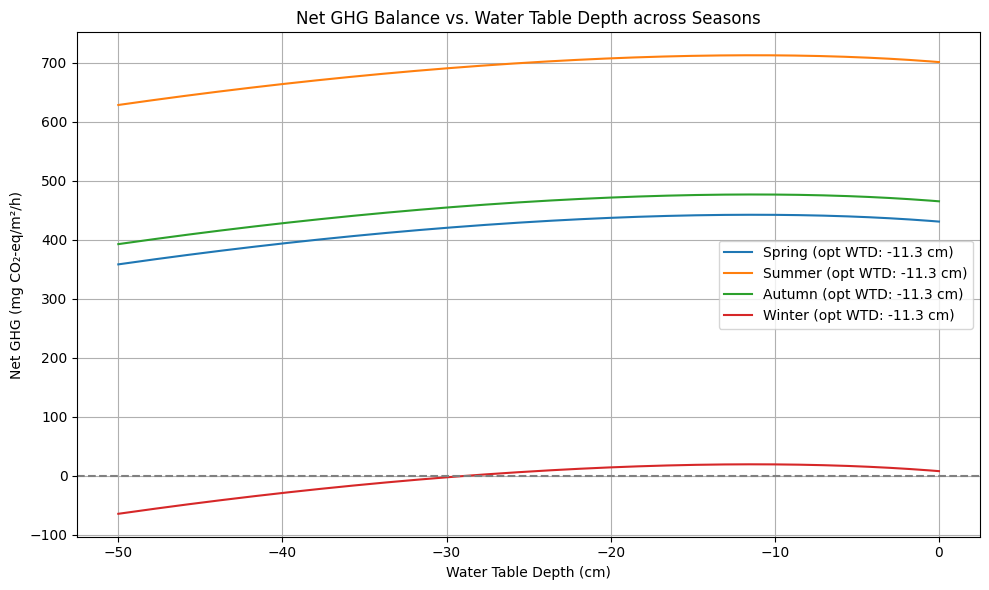

In [4]:
# Parameters
GWP_CH4 = 28  # CO₂-eq factor
GPP_params = {'GPP_max': 1200, 'k': 300, 'alpha': 1.5}
Reco_params = {'t1': 1.0, 'a': 2.0, 'b': 0.7, 'c': 0.2, 'WTD_max': 0}

# Seasonal conditions: (PAR, RVI, Ts)
seasonal_conditions = {
    "Spring":  (600, 3.5, 8),
    "Summer":  (1100, 5.5, 18),
    "Autumn":  (500, 3.0, 10),
    "Winter":  (200, 1.5, 0),
}

# WTD range
WTD_values = np.linspace(-50, 0, 200)

plt.figure(figsize=(10, 6))

for season, (PAR, RVI, Ts) in seasonal_conditions.items():
    NECB_values = []
    NetGHG_values = []

    for WTD in WTD_values:
        gpp = gpp_model(PAR, RVI, Ts, **GPP_params)
        reco = reco_model_4(RVI, WTD, Ts, **Reco_params)
        ch4 = ch4_emission(WTD)
        necb = gpp - reco
        net_ghg = necb - ch4 * GWP_CH4
        NECB_values.append(necb)
        NetGHG_values.append(net_ghg)

    NECB_values = np.array(NECB_values)
    NetGHG_values = np.array(NetGHG_values)
    optimal_index = np.argmax(NetGHG_values)
    optimal_wtd = WTD_values[optimal_index]

    plt.plot(WTD_values, NetGHG_values, label=f'{season} (opt WTD: {optimal_wtd:.1f} cm)')

# Finalize plot
plt.axhline(0, color='gray', linestyle='--')
plt.title('Net GHG Balance vs. Water Table Depth across Seasons')
plt.xlabel('Water Table Depth (cm)')
plt.ylabel('Net GHG (mg CO₂-eq/m²/h)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
